In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df1=pd.read_csv('Hogwards - 20241T.csv')
df2=pd.read_csv('Hogwards - 20242T.csv')
df3=pd.read_csv('Hogwards - 20243T.csv')

# Parte programación

<h2>Estado actual de los Data Products<h2>


In [ ]:
x=df1['ID'].count()
y=df2['ID'].count()
z=df3['ID'].count()

In [ ]:
# Creamos una lista con los distintos dominios

domains = ['Adivinacion', 'Pociones', 'Herbologia', 'Transformaciones', 'Historia de la Magia',
           'Encantamientos', 'Astronomia', 'Cuidado de Criaturas Magicas', 'Defensa Contra las Artes Oscuras']
# Creamos una función para crear una tabla con el desglose de los Data producst por dominio y estado
def data_products(df):
  # Creamos una lista vacia para guardar los value counts de cada dominio
  status_counts = []
  # Iteramos a través de todos los dominios
  for domain in domains:
      df_filtrado = df[df['Domain'] == domain]
      status_count = df_filtrado['Status'].value_counts()
      status_count.name = domain
      status_counts.append(status_count)

  # Concatenamos los distintos status_count en un DataFrame
  status_table = pd.concat(status_counts, axis=1)

  # Reemplazamos los Nan por ceros  y convertimos los valores a integer para mejor visualización de la tabla
  status_table.fillna(0, inplace=True)
  status_table = status_table.astype(int)
  # Finalmente añadimos una fila y una columna con el total de productos por dominio y estado, respectivamente
  status_table['Total'] = status_table.sum(axis=1)
  status_table.loc['Total'] = status_table.sum()

  return status_table

status_table1=data_products(df1)
status_table2=data_products(df2)
status_table3=data_products(df3)

<h2>Análisis trimestral de los Data Products en estado "Planned" o "Production"<h2>

In [ ]:
# Vamos a filtrar los datos para quedarnos con los productos en estado 'Planned' o 'Production'

df1_PP=df1[(df1['Status']=='Planned') | (df1['Status']=='Production')]
df2_PP=df2[(df2['Status']=='Planned') | (df2['Status']=='Production')]
df3_PP=df3[(df3['Status']=='Planned') | (df3['Status']=='Production')]

In [ ]:
domains = ['Adivinacion', 'Pociones', 'Herbologia', 'Transformaciones', 'Historia de la Magia',
           'Encantamientos', 'Astronomia', 'Cuidado de Criaturas Magicas', 'Defensa Contra las Artes Oscuras']

#Vamos a definir una función que nos calcule el número de usuarios por dominio y producto
def usuarios_por_dominio(df):
  # Diccionario vacio para las sumas por dominios de productos
  domain_sums = {}

  # Iteramos a traves de los dominios y calculamos el número de usuarios
  for domain in domains:
      domain_sums[domain] = df[df['Domain'] == domain]['NumberUsers'].sum()

  # Creamos un DataFrame a partir del diccionario
  Tabla_usuarios = pd.DataFrame.from_dict(domain_sums, orient='index', columns=['Número de usuarios'])
  Tabla_usuarios.index.name = 'Domain'

  # Añadimos una columna con el número de productos por dominio
  Tabla_usuarios['Número de productos'] = Tabla_usuarios.index.map(lambda domain: len(df[df['Domain'] == domain]))

  # Añadimos una columna con los usuarios por producto
  Tabla_usuarios['Número de usuarios por producto'] = Tabla_usuarios['Número de usuarios'] / Tabla_usuarios['Número de productos']
  Tabla_usuarios['Número de usuarios por producto'] = Tabla_usuarios['Número de usuarios por producto'].round(2)
  return Tabla_usuarios

# Aplicamos la función a los Dataframes previamente filtrados
Tabla_usuarios1=usuarios_por_dominio(df1_PP)
Tabla_usuarios2=usuarios_por_dominio(df2_PP)
Tabla_usuarios3=usuarios_por_dominio(df3_PP)


In [ ]:
# Número de usuarios en las áreas que no cumplen con las normas compliance

# Filtramos los Data Products que no cumplen con IsCompliance

df1_PP_filtrado = df1_PP[df1_PP['IsCompliance'] == False]
df2_PP_filtrado = df2_PP[df2_PP['IsCompliance'] == False]
df3_PP_filtrado = df3_PP[df3_PP['IsCompliance'] == False]

# Cambiamos los Nan por ceros (dominios para los cuales no existe ningún producto que no cumpla las normas) para una mejor presentación y comprensión de la tabla

Tabla_usuarios_nocompliance1=usuarios_por_dominio(df1_PP_filtrado).fillna(0)
Tabla_usuarios_nocompliance2=usuarios_por_dominio(df2_PP_filtrado).fillna(0)
Tabla_usuarios_nocompliance3=usuarios_por_dominio(df3_PP_filtrado).fillna(0)

<h2>Análisis trimestral de los Data Products en estado "Deprecated"<h2>

In [ ]:
# Filtramos los productos que se encuentran en estado 'Deprecated'

df1_dep=df1[df1['Status']=='Deprecated']
df2_dep=df2[df2['Status']=='Deprecated']
df3_dep=df3[df3['Status']=='Deprecated']

# Creamos una función que nos calcule el número de usuarios y el número de productos en estado deprecated por dominio
def data_products_deprecated(df):
  domain_sums = {}
  products_sum={}
  # Iteramos sorbe todos los dominios
  for domain in domains:
      domain_sums[domain] = df[df['Domain'] == domain]['NumberUsers'].sum()
      products_sum[domain]=len(df[df['Domain'] == domain])

  # Creamos un DataFrame a partir del diccionario
  Tabla_usuarios = pd.DataFrame({'Número de usuarios': domain_sums, 'Número de productos': products_sum})
  Tabla_usuarios.index.name = 'Domain'
   # Añadimos una fila con el total de productos y usuarios
  Tabla_usuarios.loc['Total'] = Tabla_usuarios.sum()
  Tabla_usuarios
  return Tabla_usuarios



Tabla_usuarios1_dep=data_products_deprecated(df1_dep)
Tabla_usuarios2_dep=data_products_deprecated(df2_dep)
Tabla_usuarios3_dep=data_products_deprecated(df3_dep)


<h2>Análisis de los funcionarios (Owners) por cada trimestre<h2>

Funcionarios trabajando y sus productos por estado

In [ ]:
#Creamos una función que nos calcule el número de productos por owner y estado

def products_owner_por_estado(df):
    # Agrupamos por Owner y por estado y sumamos el número de productos
    product_counts = df.groupby(['Owner', 'Status'])['ID'].count().unstack(fill_value=0)
    return product_counts

# Aplicamos la función a los Dataframes de cada trimestre

products1 = products_owner_por_estado(df1)
products2 = products_owner_por_estado(df2)
products3 = products_owner_por_estado(df3)

Tres owners con más usuarios en sus Dataproducts

(En el enunciado pide explícitamente que se haga el análisis por dominios, sin embargo, no existe ni un solo dominio que tenga más de tres owners trabajando simultáneamente, por lo tanto la pregunta me ha parecido que no tiene mucho sentido, y que por lo tanto lo que se quería era un análisis trimestral general. Igualmente, al final del trabajo se puede encontrar un anexo donde se responde a la pregunta analizando los dominios, en caso de que esa fuera la pregunta a la que se buscaba respuesta.)


In [ ]:
# Definimos una función para calcular el número de usuarios que tienen los Owners en sus productos en estado 'Planned' o 'Production'

def products_by_owner_domain_pivot(df):
    # Group by 'Owner' and 'Domain', then count occurrences
    product_counts = df.groupby(['Owner', 'Status'])['ID'].count().unstack(fill_value=0)

    # Añadimos una columna con el número de usuarios de cada Owner
    product_counts['Total usuarios'] = df.groupby(['Owner', 'Status'])['NumberUsers'].sum().groupby(level=0).sum()

    return product_counts

# Aplicamos la función a los Dataframes filtrados previamente
products1_PP = products_by_owner_domain_pivot(df1_PP).sort_values(by='Total usuarios', ascending=False)
products2_PP = products_by_owner_domain_pivot(df2_PP).sort_values(by='Total usuarios', ascending=False)
products3_PP = products_by_owner_domain_pivot(df3_PP).sort_values(by='Total usuarios', ascending=False)

Owner menos productivo por dominio

De nuevo en este caso, en la mayoria de los dominios solo existen uno o dos Owners, por lo que la pregunta en la mayoría de los casos no tiene sentido (o al menos eso me ha parecido desarrollando el trabajo). Por lo tanto, voy a responder a la pregunta del Owner menos productivo por trimestre, y despues se añadirá en el anexo el caso en el que se responde a la pregunta literal.

In [ ]:
# Creamos una función que nos cree una tabla con los productos de cada Owner por estado, y que ademas nos calcule la productividad de cada Owner

def products_by_owner_status_count(df):
    # Definimos los estados
    estados = ['Production', 'Development', 'Planned', 'Deprecated']

    # Creamos la tabla
    pivot_table = pd.pivot_table(
        df,
        values='ID',  # Using 'ID' for counting, but it won't be displayed
        index='Owner',
        columns='Status',
        aggfunc='count',  # Count occurrences instead of listing IDs
        fill_value=0  # Fill missing values with 0
    )

    # Añadimos esta línea para asegurar que si no hay un valor para ujn Owner en un estado, se le asigne el valor 0
    pivot_table = pivot_table.reindex(columns=estados, fill_value=0)

    # Añadimos las columnas para el número total de productos y la productividad
    pivot_table['Total productos'] = pivot_table.sum(axis=1)
    pivot_table['Productividad(%)']=round((1-pivot_table['Deprecated']/pivot_table['Total productos'])*100,2)

    return pivot_table

# Aplicamos las funciones a los DataFrames
tabla_productividadT1 = products_by_owner_status_count(df1)
tabla_productividadT2 = products_by_owner_status_count(df2)
tabla_productividadT3 = products_by_owner_status_count(df3)


In [ ]:
def products_by_owner_status_count_by_domain(df):
    # Definimos los estados
    estados = ['Production', 'Development', 'Planned', 'Deprecated']

    # Creamos la tabla pivot, incluyendo 'Domain' in the index
    pivot_table = pd.pivot_table(
        df,
        values='ID',
        index=['Domain', 'Owner'],  # Include 'Domain' in the index
        columns='Status',
        aggfunc='count',
        fill_value=0
    )

    # Aseguramos que todos los estados estén presentes
    pivot_table = pivot_table.reindex(columns=estados, fill_value=0)

    # Calculamos el total de productos y la productividad por dominio y owner
    pivot_table['Total productos'] = pivot_table.sum(axis=1)
    pivot_table['Productividad(%)'] = (1 - pivot_table['Deprecated'] / pivot_table['Total productos']) * 100

    return pivot_table


# Aplicamos la función a los DataFrames
tabla_productividadT1_dominios = products_by_owner_status_count_by_domain(df1)
tabla_productividadT2_dominios = products_by_owner_status_count_by_domain(df2)
tabla_productividadT3_dominios = products_by_owner_status_count_by_domain(df3)


Owners que trabajen en más de un dominio

In [ ]:
# Creamos una función para analizar si existen Owners que están trabajando en varios dominios a la vez

def products_by_owner_domain_all_trimesters(df1, df2, df3):
    # Concatenamos los Dataframes de los tres trimestres
    df_combinado = pd.concat([df1, df2, df3])

    # Agrupamos por dominio y Owner, y hacemos la suma de productos
    product_counts = df_combinado.groupby(['Owner', 'Domain'])['ID'].count().reset_index()

    product_counts.rename(columns={'ID': 'Total Products'}, inplace=True)

    # Cambiamos los Nan por ceros
    pivot_table = product_counts.pivot(index='Owner', columns='Domain', values='Total Products').fillna(0)

    # Convertimos los valores en integers para mejorar la visualización
    pivot_table = pivot_table.astype(int)

    return pivot_table

# Aplicamos la función a los Dataframes
tabla_combinada = products_by_owner_domain_all_trimesters(df1, df2, df3)

#  Presentación de los resultados

<h2>Estado actual de los Data Products</h2>


In [ ]:
print('Número de Data Products por trimestre: ')
print('Primer trimestre: '+str(x))
print('Segundo trimestre: '+str(y))
print('Tercer trimestre: '+str(z))

Número de Data Products por trimestre: 
Primer trimestre: 50
Segundo trimestre: 70
Tercer trimestre: 87


A continuación podemos observar un análisis detallado del número de Data products por estado y dominio para los tres trimestres

<h3>Primer trimestre</h3>

In [ ]:
status_table1

,Adivinacion,Pociones,Herbologia,Transformaciones,Historia de la Magia,Encantamientos,Astronomia,Cuidado de Criaturas Magicas,Defensa Contra las Artes Oscuras,Total
Status,,,,,,,,,,
Production,4,3,0,1,1,2,1,2,1,15
Development,3,2,0,2,3,1,0,0,1,12
Deprecated,1,2,3,2,2,2,0,0,0,12
Planned,0,1,4,1,0,0,3,1,1,11
Total,8,8,7,6,6,5,4,3,3,50


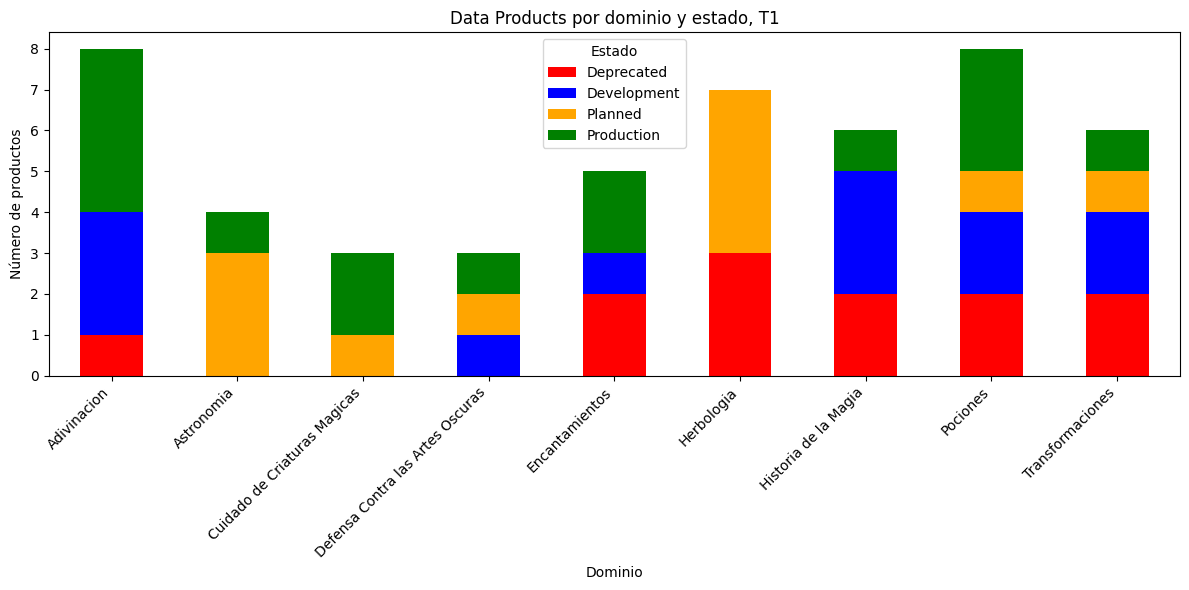

In [ ]:
# Agrupamos los productos por dominio y estado
product_counts = df1.groupby(['Domain', 'Status'])['ID'].count().reset_index()

# Creamos una tabla para utilizarla en la gráfica
pivot_table = product_counts.pivot(index=['Domain'], columns='Status', values='ID').fillna(0)

# Definimos los colores de la gráfica
status_colors = {'Production': 'green',
                 'Development': 'blue',
                 'Planned': 'orange',
                 'Deprecated': 'red'
                 }
# Ploteamos la tabla previamente creada
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=status_colors)
plt.title('Data Products por dominio y estado, T1')
plt.xlabel('Dominio')
plt.ylabel('Número de productos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

<h3>Segundo trimestre<h3>

In [ ]:
status_table2

,Adivinacion,Pociones,Herbologia,Transformaciones,Historia de la Magia,Encantamientos,Astronomia,Cuidado de Criaturas Magicas,Defensa Contra las Artes Oscuras,Total
Status,,,,,,,,,,
Production,6,5,1,2,1,2,2,3,1,23
Development,3,2,0,2,4,1,1,0,1,14
Deprecated,1,2,3,4,2,3,0,1,1,17
Planned,1,1,5,1,2,0,3,2,1,16
Total,11,10,9,9,9,6,6,6,4,70


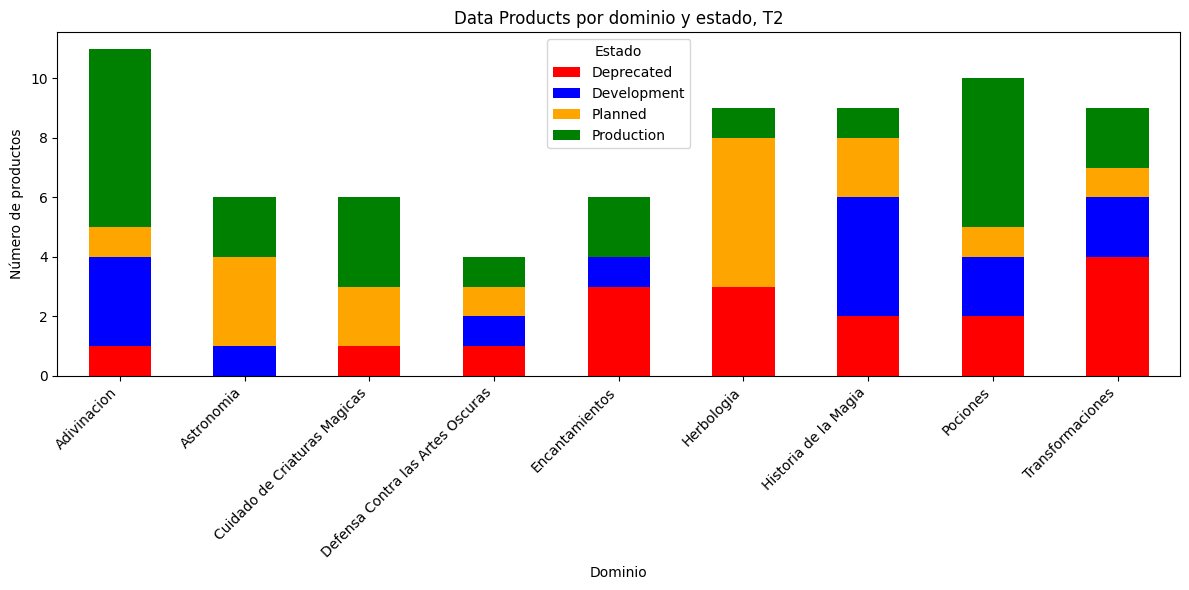

In [ ]:
# Repetimos la misma gráfica pero para los Data Products del segundo trimestre

product_counts = df2.groupby(['Domain', 'Status'])['ID'].count().reset_index()


pivot_table = product_counts.pivot(index=['Domain'], columns='Status', values='ID').fillna(0)

status_colors = {'Production': 'green',
                 'Development': 'blue',
                 'Planned': 'orange',
                 'Deprecated': 'red'
                 }

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=status_colors)
plt.title('Data Products por dominio y estado, T2')
plt.xlabel('Dominio')
plt.ylabel('Número de productos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

<h3>Tercer trimestre<h3>

In [ ]:
status_table3

,Adivinacion,Pociones,Herbologia,Transformaciones,Historia de la Magia,Encantamientos,Astronomia,Cuidado de Criaturas Magicas,Defensa Contra las Artes Oscuras,Total
Status,,,,,,,,,,
Production,7,5,1,2,1,2,2,3,1,24
Development,3,2,0,2,5,3,1,0,2,18
Planned,2,1,6,1,3,0,3,2,6,24
Deprecated,1,3,3,4,3,3,1,2,1,21
Total,13,11,10,9,12,8,7,7,10,87


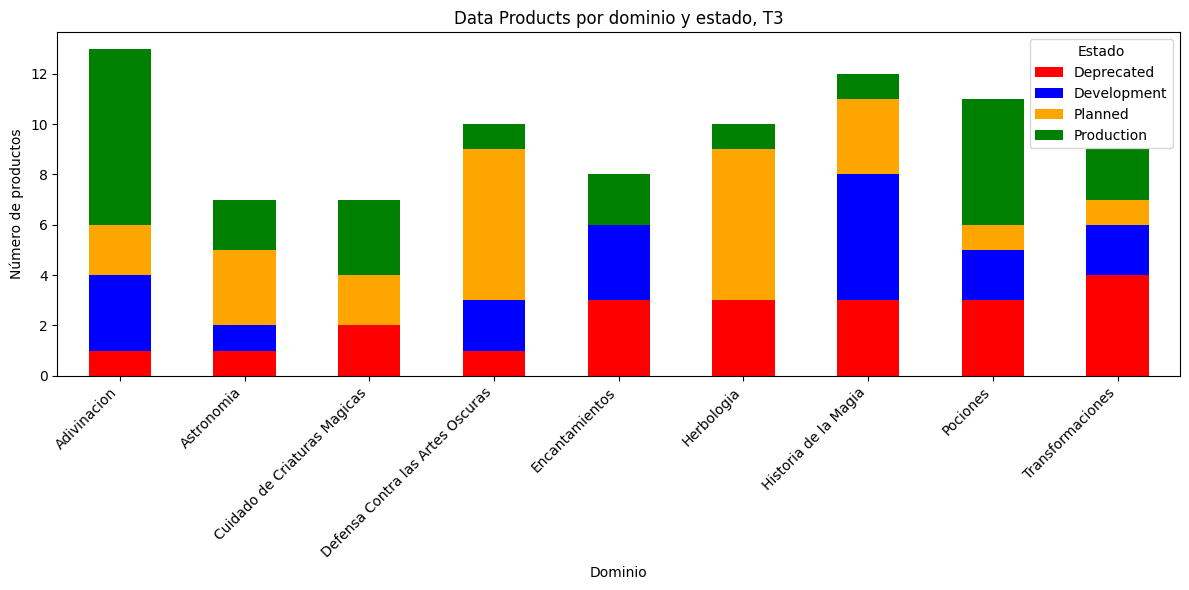

In [ ]:
# Y repetimos la misma gráfica para el T3
product_counts = df3.groupby(['Domain', 'Status'])['ID'].count().reset_index()


pivot_table = product_counts.pivot(index=['Domain'], columns='Status', values='ID').fillna(0)

status_colors = {'Production': 'green',
                 'Development': 'blue',
                 'Planned': 'orange',
                 'Deprecated': 'red'
                 }

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=status_colors)
plt.title('Data Products por dominio y estado, T3')
plt.xlabel('Dominio')
plt.ylabel('Número de productos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

<h2>Análisis trimestral de los Data Products en estado ''Planned'' o ''Production''</h2>
<h3>Cumplimiento de las normas compliance<h3>

Primer trimestre


In [ ]:
num_rows = df1_PP.shape[0]
print(f"El número de productos en fase Planned o Production en el primer custrimestre es de {num_rows}")

df1_PP.value_counts('IsCompliance')


El número de productos en fase Planned o Production en el primer custrimestre es de 26


,count
IsCompliance,
True,14
False,12


Segundo trimestre

In [ ]:

num_rows2 = df2_PP.shape[0]
print(f"El número de productos en fase Planned o Production en el segundo custrimestre es de: {num_rows2}")

df2_PP.value_counts('IsCompliance')


El número de productos en fase Planned o Production en el segundo custrimestre es de: 39


,count
IsCompliance,
True,22
False,17


Tercer cuatrimestre

In [ ]:
num_rows3 = df3_PP.shape[0]
print(f"El número de productos en fase Planned o Production en el tercer custrimestre es de: {num_rows3}")

df3_PP.value_counts('IsCompliance')

El número de productos en fase Planned o Production en el tercer custrimestre es de: 48


,count
IsCompliance,
True,28
False,20


Vamos a realizar una gráfica de los datos expuestos en este apartado para ayudar a su visualización

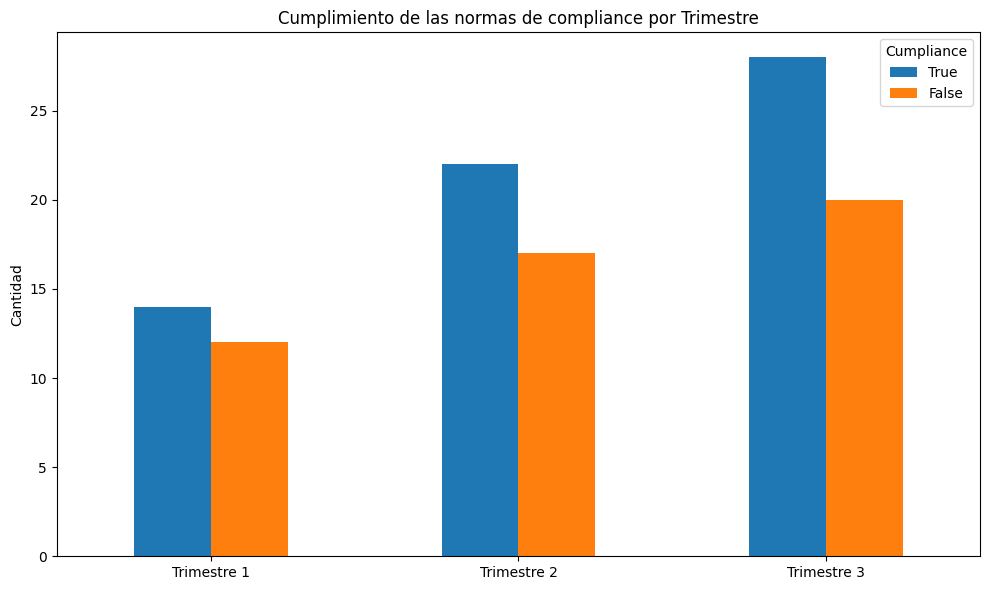

In [ ]:
# Concatenamos los tres dataframes previamente filtrados para que solo contengan datos de los productos 'Planned' o 'Production'

compliance_counts = pd.concat([
    df1_PP['IsCompliance'].value_counts().rename('Trimestre 1'),
    df2_PP['IsCompliance'].value_counts().rename('Trimestre 2'),
    df3_PP['IsCompliance'].value_counts().rename('Trimestre 3')
], axis=1).fillna(0).T

# Ploteamos los datos
compliance_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Cumplimiento de las normas de compliance por Trimestre')

plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Cumpliance')
plt.tight_layout()
plt.show()

Y ahora vamos a visualizar el estado de cumplimiento de las normas compliance para todos los Data Products

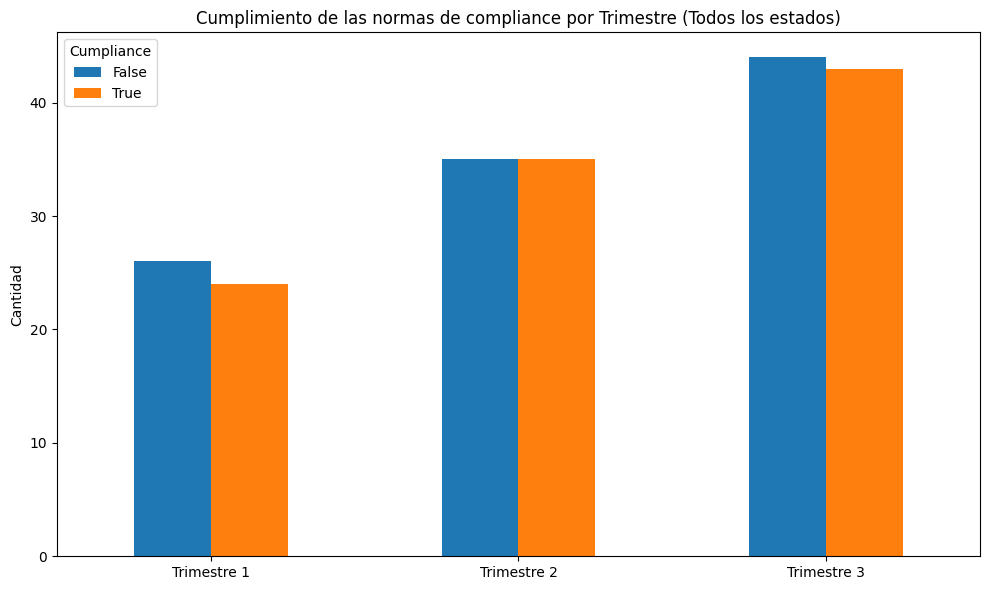

In [ ]:
# Hacemos exactamente lo mismo que en la gráfica anterior, pero lo aplicamos sobre los DataFrames sin filtrar
# para que contenga todos los productos

compliance_counts_todos_status = pd.concat([
    df1['IsCompliance'].value_counts().rename('Trimestre 1'),
    df2['IsCompliance'].value_counts().rename('Trimestre 2'),
    df3['IsCompliance'].value_counts().rename('Trimestre 3')
], axis=1).fillna(0).T


compliance_counts_todos_status.plot(kind='bar', figsize=(10, 6))
plt.title('Cumplimiento de las normas de compliance por Trimestre (Todos los estados)')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Cumpliance')
plt.tight_layout()
plt.show()

Observamos que el porcentaje de productos que cumplen las normas es mayor entre los productos en estado 'Planned' o 'Production'

<h3>Número de usuarios de los Dataproducts por dominio<h3>
Primer trimestre

In [ ]:
Tabla_usuarios1

,Número de usuarios,Número de productos,Número de usuarios por producto
Domain,,,
Adivinacion,259,4,64.75
Pociones,288,4,72.00
Herbologia,372,4,93.00
Transformaciones,78,2,39.00
Historia de la Magia,56,1,56.00
Encantamientos,200,2,100.00
Astronomia,363,4,90.75
Cuidado de Criaturas Magicas,183,3,61.00
Defensa Contra las Artes Oscuras,177,2,88.50


Segundo trimestre


In [ ]:
Tabla_usuarios2

,Número de usuarios,Número de productos,Número de usuarios por producto
Domain,,,
Adivinacion,483,7,69.00
Pociones,368,6,61.33
Herbologia,468,6,78.00
Transformaciones,126,3,42.00
Historia de la Magia,190,3,63.33
Encantamientos,200,2,100.00
Astronomia,463,5,92.60
Cuidado de Criaturas Magicas,262,5,52.40
Defensa Contra las Artes Oscuras,177,2,88.50


Tercer trimestre

In [ ]:
Tabla_usuarios3

,Número de usuarios,Número de productos,Número de usuarios por producto
Domain,,,
Adivinacion,639,9,71.00
Pociones,368,6,61.33
Herbologia,566,7,80.86
Transformaciones,126,3,42.00
Historia de la Magia,269,4,67.25
Encantamientos,200,2,100.00
Astronomia,463,5,92.60
Cuidado de Criaturas Magicas,262,5,52.40
Defensa Contra las Artes Oscuras,598,7,85.43


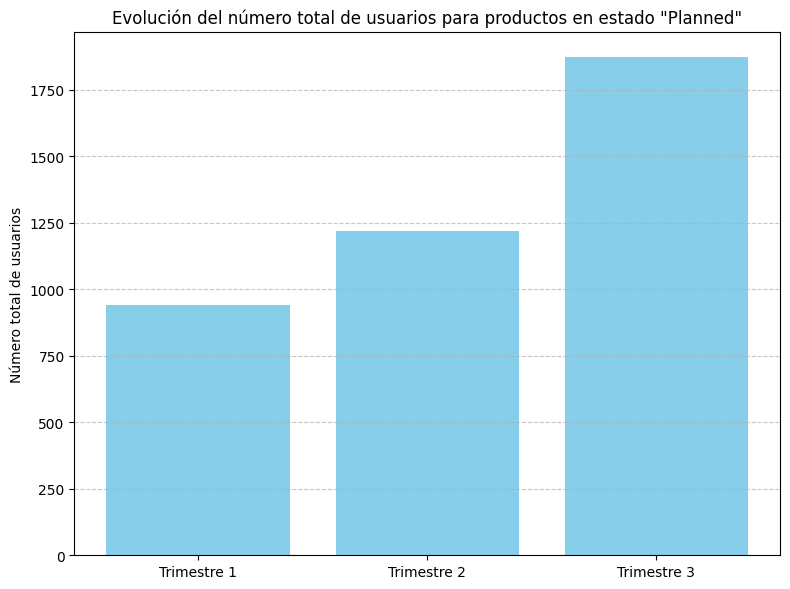

In [ ]:
# Calculamos el número total de usuarios en estado 'Planned'
usuarios_totalT1_planned = df1_PP[df1_PP['Status'] == 'Planned']['NumberUsers'].sum()
usuarios_totalT2_planned = df2_PP[df2_PP['Status'] == 'Planned']['NumberUsers'].sum()
usuarios_totalT3_planned = df3_PP[df3_PP['Status'] == 'Planned']['NumberUsers'].sum()

# Creamos una lista con los trimestres y otra con el número total de usuarios
trimestres = ['Trimestre 1', 'Trimestre 2', 'Trimestre 3']
usuarios_totales = [usuarios_totalT1_planned, usuarios_totalT2_planned, usuarios_totalT3_planned]

# Ploteamos los datos en una gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(trimestres, usuarios_totales, color='skyblue')
plt.title('Evolución del número total de usuarios para productos en estado "Planned"')
plt.ylabel('Número total de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

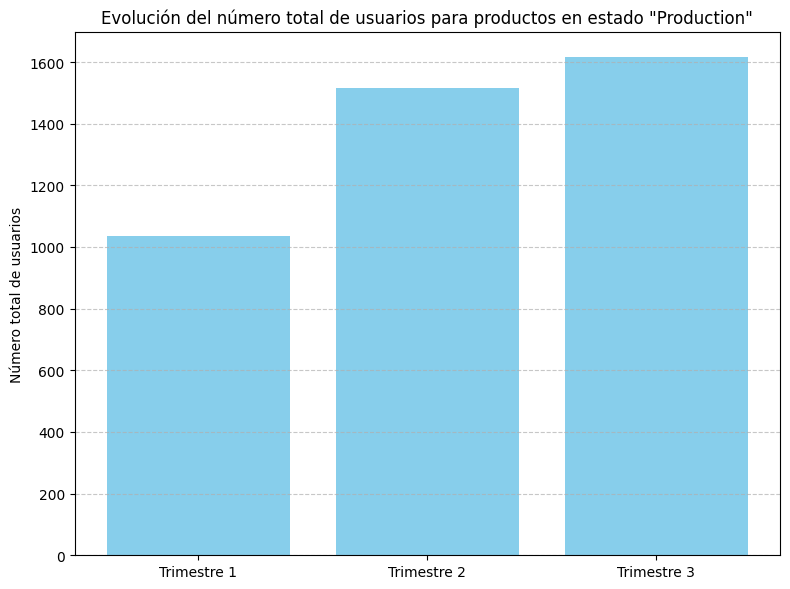

In [ ]:
# Repetimos el mismo proceso anterior, solo que para los Data Products en estado 'Production'
usuarios_totalT1_production = df1_PP[df1_PP['Status'] == 'Production']['NumberUsers'].sum()
usuarios_totalT2_production  = df2_PP[df2_PP['Status'] == 'Production']['NumberUsers'].sum()
usuarios_totalT3_production  = df3_PP[df3_PP['Status'] == 'Production']['NumberUsers'].sum()


trimestres = ['Trimestre 1', 'Trimestre 2', 'Trimestre 3']
total_users = [usuarios_totalT1_production , usuarios_totalT2_production , usuarios_totalT3_production ]


plt.figure(figsize=(8, 6))
plt.bar(trimestres, total_users, color='skyblue')
plt.title('Evolución del número total de usuarios para productos en estado "Production"')
plt.ylabel('Número total de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Número de usuarios en los productos que no cumplen las normas compliance<h3>

Primer trimestre

In [ ]:
Tabla_usuarios_nocompliance1

,Número de usuarios,Número de productos,Número de usuarios por producto
Domain,,,
Adivinacion,113,2,56.5
Pociones,0,0,0.0
Herbologia,372,4,93.0
Transformaciones,27,1,27.0
Historia de la Magia,56,1,56.0
Encantamientos,0,0,0.0
Astronomia,68,1,68.0
Cuidado de Criaturas Magicas,183,3,61.0
Defensa Contra las Artes Oscuras,0,0,0.0


Segundo trimestre

In [ ]:
Tabla_usuarios_nocompliance2


,Número de usuarios,Número de productos,Número de usuarios por producto
Domain,,,
Adivinacion,113,2,56.5
Pociones,23,1,23.0
Herbologia,468,6,78.0
Transformaciones,27,1,27.0
Historia de la Magia,90,2,45.0
Encantamientos,0,0,0.0
Astronomia,168,2,84.0
Cuidado de Criaturas Magicas,183,3,61.0
Defensa Contra las Artes Oscuras,0,0,0.0


Tercer trimestre

In [ ]:
Tabla_usuarios_nocompliance3

,Número de usuarios,Número de productos,Número de usuarios por producto
Domain,,,
Adivinacion,269,4,67.25
Pociones,23,1,23.00
Herbologia,566,7,80.86
Transformaciones,27,1,27.00
Historia de la Magia,90,2,45.00
Encantamientos,0,0,0.00
Astronomia,168,2,84.00
Cuidado de Criaturas Magicas,183,3,61.00
Defensa Contra las Artes Oscuras,0,0,0.00


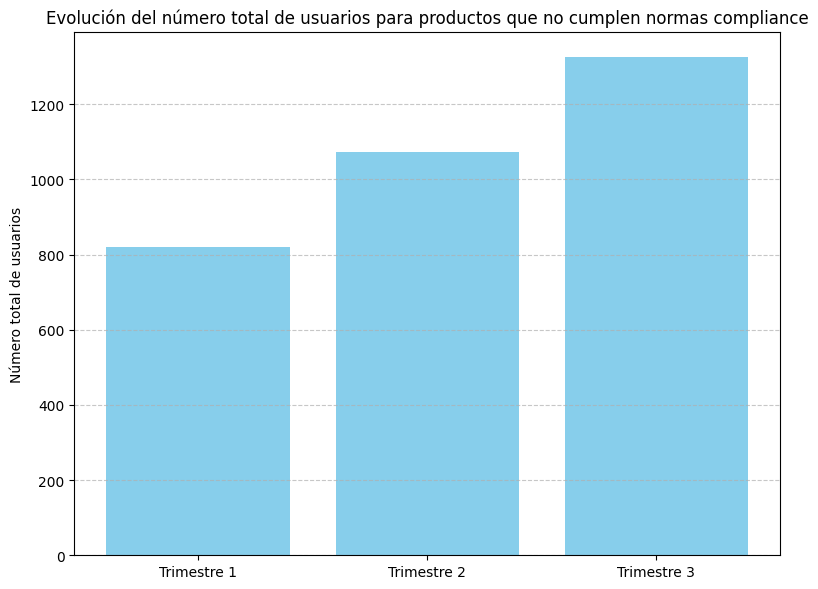

In [ ]:
# Finalmente vamos a realizar la gráfica de usuarios totales por trimestre para los estados 'Planned' o 'Production'
#pero para el caso en el que no se cumplen las normas compliance

usuarios_no_complianceT1 = df1_PP[df1_PP['IsCompliance'] == False]['NumberUsers'].sum()
usuarios_no_complianceT2 = df2_PP[df2_PP['IsCompliance'] == False]['NumberUsers'].sum()
usuarios_no_complianceT3  = df3_PP[df3_PP['IsCompliance'] == False]['NumberUsers'].sum()


trimestres = ['Trimestre 1', 'Trimestre 2', 'Trimestre 3']
total_users = [usuarios_no_complianceT1, usuarios_no_complianceT2, usuarios_no_complianceT3]


plt.figure(figsize=(8, 6))
plt.bar(trimestres, total_users, color='skyblue')
plt.title('Evolución del número total de usuarios para productos que no cumplen normas compliance')
plt.ylabel('Número total de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2>Análisis trimestral de los Data Products "Deprecated"<h2>

<h3>Data Products en estado 'Deprecated' por dominio y número total de usuarios

Primer trimestre

In [ ]:
Tabla_usuarios1_dep

,Número de usuarios,Número de productos
Domain,,
Adivinacion,52,1
Pociones,81,2
Herbologia,170,3
Transformaciones,200,2
Historia de la Magia,97,2
Encantamientos,68,2
Astronomia,0,0
Cuidado de Criaturas Magicas,0,0
Defensa Contra las Artes Oscuras,0,0


Segundo trimestre

In [ ]:
Tabla_usuarios2_dep

,Número de usuarios,Número de productos
Domain,,
Adivinacion,52,1
Pociones,81,2
Herbologia,170,3
Transformaciones,324,4
Historia de la Magia,97,2
Encantamientos,139,3
Astronomia,0,0
Cuidado de Criaturas Magicas,55,1
Defensa Contra las Artes Oscuras,41,1


Tercer trimestre

In [ ]:
Tabla_usuarios3_dep

,Número de usuarios,Número de productos
Domain,,
Adivinacion,52,1
Pociones,181,3
Herbologia,170,3
Transformaciones,324,4
Historia de la Magia,139,3
Encantamientos,139,3
Astronomia,33,1
Cuidado de Criaturas Magicas,92,2
Defensa Contra las Artes Oscuras,41,1


<h2>Análisis de los funcionarios (Owners) por cada trimestre<h2>

<h3>Funcionarios y Data Products asignados por estado<h3>

Primer trimestre

In [ ]:
display(products1)

Status,Deprecated,Development,Planned,Production
Owner,,,,
Alastor Moody,0,0,0,1
Aurora Sinistra,0,0,3,1
Cuthbert Binns,2,3,0,1
Filius Flitwick,2,1,0,2
Firenze,0,1,0,2
Horace Slughorn,0,1,1,1
Minerva McGonagall,2,2,1,1
Pomona Sprout,3,0,4,0
Rubeus Hagrid,0,0,1,1


Segundo trimestre

In [ ]:
display(products2)

Status,Deprecated,Development,Planned,Production
Owner,,,,
Alastor Moody,1,0,0,1
Aurora Sinistra,0,1,3,2
Cuthbert Binns,2,4,2,1
Filius Flitwick,3,1,0,2
Firenze,0,1,0,3
Horace Slughorn,0,1,1,2
Minerva McGonagall,4,2,1,2
Pomona Sprout,3,0,5,1
Rubeus Hagrid,0,0,2,2


Tercer trimestre

In [ ]:
display(products3)

Status,Deprecated,Development,Planned,Production
Owner,,,,
Alastor Moody,1,0,1,1
Aurora Sinistra,1,1,3,2
Cuthbert Binns,3,5,3,1
Filius Flitwick,3,3,0,2
Firenze,0,1,1,4
Horace Slughorn,0,1,1,2
Minerva McGonagall,4,2,1,2
Pomona Sprout,3,0,6,1
Remus Lupin,0,1,1,0


<h3> Los tres owners con más usuarios en sus Data Products en estado 'Planned' o 'Production'

Primer trimestre

In [ ]:
products1_PP.head(3)

Status,Planned,Production,Total usuarios
Owner,,,
Pomona Sprout,4,0,372
Aurora Sinistra,3,1,363
Severus Snape,1,2,237


Segundo trimestre

In [ ]:
products2_PP.head(3)

Status,Planned,Production,Total usuarios
Owner,,,
Pomona Sprout,5,1,468
Aurora Sinistra,3,2,463
Sybill Trelawney,1,3,267


Tercer trimestre

In [ ]:
products3_PP.head(3)

Status,Planned,Production,Total usuarios
Owner,,,
Pomona Sprout,6,1,566
Severus Snape,4,3,510
Aurora Sinistra,3,2,463


<h3> Owner menos productivos por trimestre <h3>

Primer trimestre

In [ ]:
display(tabla_productividadT1)

Status,Production,Development,Planned,Deprecated,Total productos,Productividad(%)
Owner,,,,,,
Alastor Moody,1,0,0,0,1,100.00
Aurora Sinistra,1,0,3,0,4,100.00
Cuthbert Binns,1,3,0,2,6,66.67
Filius Flitwick,2,1,0,2,5,60.00
Firenze,2,1,0,0,3,100.00
Horace Slughorn,1,1,1,0,3,100.00
Minerva McGonagall,1,2,1,2,6,66.67
Pomona Sprout,0,0,4,3,7,57.14
Rubeus Hagrid,1,0,1,0,2,100.00


In [ ]:
print('El Owner menos productivo en el primer trimestre es Pomona Sprout, con una productividad de', min(tabla_productividadT1['Productividad(%)']), '%')

El Owner menos productivo en el primer trimestre es Pomona Sprout, con una productividad de 57.14 %


Segundo trimestre

In [ ]:
display(tabla_productividadT2)

Status,Production,Development,Planned,Deprecated,Total productos,Productividad(%)
Owner,,,,,,
Alastor Moody,1,0,0,1,2,50.00
Aurora Sinistra,2,1,3,0,6,100.00
Cuthbert Binns,1,4,2,2,9,77.78
Filius Flitwick,2,1,0,3,6,50.00
Firenze,3,1,0,0,4,100.00
Horace Slughorn,2,1,1,0,4,100.00
Minerva McGonagall,2,2,1,4,9,55.56
Pomona Sprout,1,0,5,3,9,66.67
Rubeus Hagrid,2,0,2,0,4,100.00


In [ ]:
print('Los Owners menos productivos del segundo trimestre son Alastor Moody y Wilhelmina Grubbly-Plank,\n ambos con una productividad de', min(tabla_productividadT2['Productividad(%)']),'%')

Los Owners menos productivos del segundo trimestre son Alastor Moody y Wilhelmina Grubbly-Plank,
 ambos con una productividad de 50.0 %


Tercer trimestre

In [ ]:
display(tabla_productividadT3)

Status,Production,Development,Planned,Deprecated,Total productos,Productividad(%)
Owner,,,,,,
Alastor Moody,1,0,1,1,3,66.67
Aurora Sinistra,2,1,3,1,7,85.71
Cuthbert Binns,1,5,3,3,12,75.00
Filius Flitwick,2,3,0,3,8,62.50
Firenze,4,1,1,0,6,100.00
Horace Slughorn,2,1,1,0,4,100.00
Minerva McGonagall,2,2,1,4,9,55.56
Pomona Sprout,1,0,6,3,10,70.00
Remus Lupin,0,1,1,0,2,100.00


In [ ]:
print('El Owners menos productivo del segundo trimestre es Wilhelmina Grubbly-Plank con una productividad de', min(tabla_productividadT3['Productividad(%)']), '%')

El Owners menos productivo del segundo trimestre es Wilhelmina Grubbly-Plank con una productividad de 33.33 %


<h3>Magos trabajando en varios dominios<h3>

In [ ]:
# Hacemos un bucle que nos diga en que dominio trabaja cada Owner
for owner in tabla_combinada.index:
    domains = tabla_combinada.columns[tabla_combinada.loc[owner] > 0].tolist()
    print(f"Owner: {owner}, Domains: {domains}")

Owner: Alastor Moody, Domains: ['Defensa Contra las Artes Oscuras']
Owner: Aurora Sinistra, Domains: ['Astronomia']
Owner: Cuthbert Binns, Domains: ['Historia de la Magia']
Owner: Filius Flitwick, Domains: ['Encantamientos']
Owner: Firenze, Domains: ['Adivinacion']
Owner: Horace Slughorn, Domains: ['Pociones']
Owner: Minerva McGonagall, Domains: ['Transformaciones']
Owner: Pomona Sprout, Domains: ['Herbologia']
Owner: Remus Lupin, Domains: ['Defensa Contra las Artes Oscuras']
Owner: Rubeus Hagrid, Domains: ['Cuidado de Criaturas Magicas']
Owner: Severus Snape, Domains: ['Defensa Contra las Artes Oscuras', 'Pociones']
Owner: Sybill Trelawney, Domains: ['Adivinacion']
Owner: Wilhelmina Grubbly-Plank, Domains: ['Cuidado de Criaturas Magicas']


Podemos observar que el único Owner que trabaja en varios dominios a la vez es Severus Snape, que trabaja tanto en 'Defensa contra las artes oscuras' como en 'Pociones'. A continuación se muestra una tabla más detallada acerca del trabajo de cada owner por dominios, donde también podemos ver el número de Dta products que tienen asignados.

In [ ]:
display(tabla_combinada)

Domain,Adivinacion,Astronomia,Cuidado de Criaturas Magicas,Defensa Contra las Artes Oscuras,Encantamientos,Herbologia,Historia de la Magia,Pociones,Transformaciones
Owner,,,,,,,,,
Alastor Moody,0,0,0,6,0,0,0,0,0
Aurora Sinistra,0,17,0,0,0,0,0,0,0
Cuthbert Binns,0,0,0,0,0,0,27,0,0
Filius Flitwick,0,0,0,0,19,0,0,0,0
Firenze,13,0,0,0,0,0,0,0,0
Horace Slughorn,0,0,0,0,0,0,0,11,0
Minerva McGonagall,0,0,0,0,0,0,0,0,24
Pomona Sprout,0,0,0,0,0,26,0,0,0
Remus Lupin,0,0,0,2,0,0,0,0,0


Finalmente presentamos una gráfica en el que se ve como evoluciona el número de Owners por dominio a lo aargo de los tres trimestres

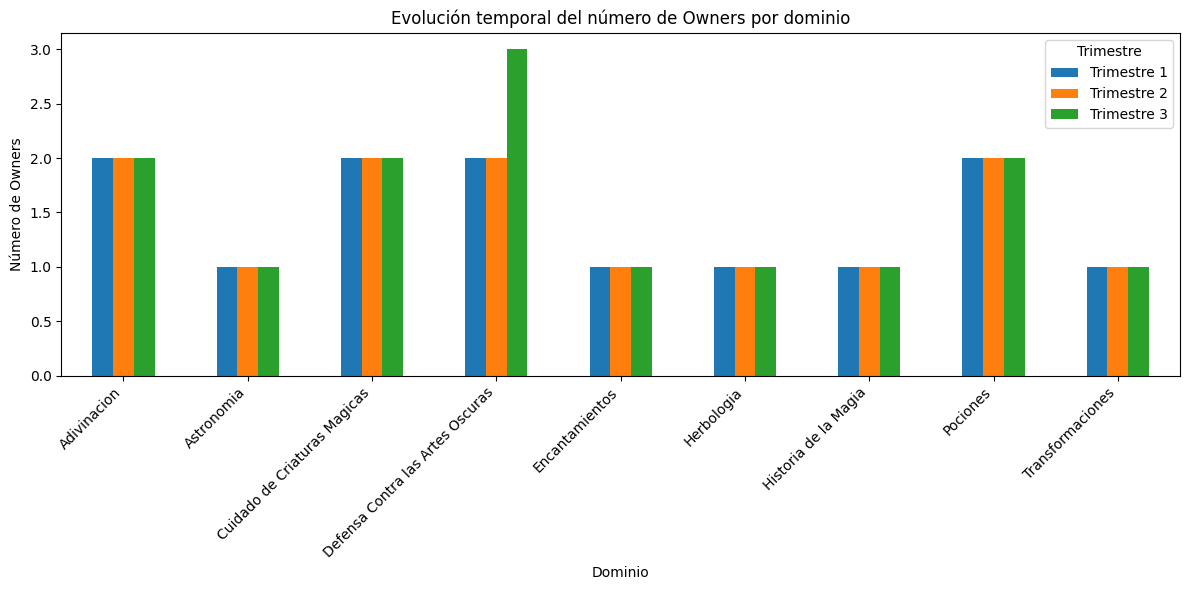

In [ ]:
# Función para obtenr los Owner que trabajan en cada dominio para cada trimestre
def get_unique_owners_per_domain(df):
    return df.groupby('Domain')['Owner'].nunique()

# Aplicamos la función a los Dataframes
owners_per_domain_t1 = get_unique_owners_per_domain(df1)
owners_per_domain_t2 = get_unique_owners_per_domain(df2)
owners_per_domain_t3 = get_unique_owners_per_domain(df3)

# Combinamos los datos en una sola tabla
owners_df = pd.DataFrame({
    'Trimestre 1': owners_per_domain_t1,
    'Trimestre 2': owners_per_domain_t2,
    'Trimestre 3': owners_per_domain_t3
}).fillna(0).astype(int)

# Ploteamos los datos obtenidos
owners_df.plot(kind='bar', figsize=(12, 6))
plt.title('Evolución temporal del número de Owners por dominio')
plt.xlabel('Dominio')
plt.ylabel('Número de Owners')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

<h2> Anexo <h2>

<h3> Tres owners con más usuarios por dominio en sus Data Products en estado 'Planned' o 'Production'<h3>


In [ ]:
# Función que nos filtra los datos y nos calcula el número de usuarios

def products_by_owner_domain_pivot_by_domain(df):

    filtered_df = df[(df['Status'] == 'Planned') | (df['Status'] == 'Production')]

    owner_domain_users = filtered_df.groupby(['Owner', 'Domain'])['NumberUsers'].sum().reset_index()

    return owner_domain_users

# Aplicamos las funciones a los Data Frames filtrados
products1_PP_by_domain = products_by_owner_domain_pivot_by_domain(df1_PP)
products2_PP_by_domain = products_by_owner_domain_pivot_by_domain(df2_PP)
products3_PP_by_domain = products_by_owner_domain_pivot_by_domain(df3_PP)

Primer Trimestre:


,Owner,Domain,NumberUsers
0,Alastor Moody,Defensa Contra las Artes Oscuras,96
1,Aurora Sinistra,Astronomia,363
2,Cuthbert Binns,Historia de la Magia,56
3,Filius Flitwick,Encantamientos,200
4,Firenze,Adivinacion,150
5,Horace Slughorn,Pociones,132
6,Minerva McGonagall,Transformaciones,78
7,Pomona Sprout,Herbologia,372
8,Rubeus Hagrid,Cuidado de Criaturas Magicas,168
9,Severus Snape,Defensa Contra las Artes Oscuras,81


Primer trimestre

In [ ]:
display(products1_PP_by_domain)

,Owner,Domain,NumberUsers
0,Alastor Moody,Defensa Contra las Artes Oscuras,96
1,Aurora Sinistra,Astronomia,363
2,Cuthbert Binns,Historia de la Magia,56
3,Filius Flitwick,Encantamientos,200
4,Firenze,Adivinacion,150
5,Horace Slughorn,Pociones,132
6,Minerva McGonagall,Transformaciones,78
7,Pomona Sprout,Herbologia,372
8,Rubeus Hagrid,Cuidado de Criaturas Magicas,168
9,Severus Snape,Defensa Contra las Artes Oscuras,81


Segundo trimestre

In [ ]:
display(products2_PP_by_domain)

Segundo trimestre:


,Owner,Domain,NumberUsers
0,Alastor Moody,Defensa Contra las Artes Oscuras,96
1,Aurora Sinistra,Astronomia,463
2,Cuthbert Binns,Historia de la Magia,190
3,Filius Flitwick,Encantamientos,200
4,Firenze,Adivinacion,216
5,Horace Slughorn,Pociones,189
6,Minerva McGonagall,Transformaciones,126
7,Pomona Sprout,Herbologia,468
8,Rubeus Hagrid,Cuidado de Criaturas Magicas,247
9,Severus Snape,Defensa Contra las Artes Oscuras,81


Tercer trimestre

In [ ]:
display(products3_PP_by_domain)

Tercer trimestre:


,Owner,Domain,NumberUsers
0,Alastor Moody,Defensa Contra las Artes Oscuras,180
1,Aurora Sinistra,Astronomia,463
2,Cuthbert Binns,Historia de la Magia,269
3,Filius Flitwick,Encantamientos,200
4,Firenze,Adivinacion,372
5,Horace Slughorn,Pociones,189
6,Minerva McGonagall,Transformaciones,126
7,Pomona Sprout,Herbologia,566
8,Remus Lupin,Defensa Contra las Artes Oscuras,87
9,Rubeus Hagrid,Cuidado de Criaturas Magicas,247


Como podemos observar, en ningún dominio existen más de tres funcionarios trabajando simultaneamente, por lo tanto todos entran dentro de los tres Owners con más usuarios por dominio.

<h3> Owner menos productivo por trimestre y dominio

In [ ]:
# Función que nos filtre los Owner menos productivos por dominio

def menos_productividad_por_dominio(df):
    # Agrupamos por dominio y elegimos el menor valor de productividad
    min_productividad_by_domain = df.groupby('Domain')['Productividad(%)'].min()
    df_reset_index = df.reset_index()
    resultado = df_reset_index[df_reset_index.apply(lambda row: row['Productividad(%)'] == min_productividad_by_domain[row['Domain']], axis=1)]

    # Definimos la tabla de salida con los datos que nos interesan
    resultado = resultado[['Domain', 'Owner', 'Productividad(%)']]

    return resultado

# Finalmente aplicamos la función a los tres Data Frames

menor_productividadT1 = menos_productividad_por_dominio(tabla_productividadT1_dominios)
menor_productividadT2 = menos_productividad_por_dominio(tabla_productividadT2_dominios)
menor_productividadT3 = menos_productividad_por_dominio(tabla_productividadT3_dominios)

Primer trimestre

In [ ]:
menor_productividadT1

Status,Domain,Owner,Productividad(%)
1,Adivinacion,Sybill Trelawney,80.000000
2,Astronomia,Aurora Sinistra,100.000000
3,Cuidado de Criaturas Magicas,Rubeus Hagrid,100.000000
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,100.000000
5,Defensa Contra las Artes Oscuras,Alastor Moody,100.000000
6,Defensa Contra las Artes Oscuras,Severus Snape,100.000000
7,Encantamientos,Filius Flitwick,60.000000
8,Herbologia,Pomona Sprout,57.142857
9,Historia de la Magia,Cuthbert Binns,66.666667
11,Pociones,Severus Snape,60.000000


Segundo trimestre

In [ ]:
menor_productividadT2

Status,Domain,Owner,Productividad(%)
1,Adivinacion,Sybill Trelawney,85.714286
2,Astronomia,Aurora Sinistra,100.000000
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,50.000000
5,Defensa Contra las Artes Oscuras,Alastor Moody,50.000000
7,Encantamientos,Filius Flitwick,50.000000
8,Herbologia,Pomona Sprout,66.666667
9,Historia de la Magia,Cuthbert Binns,77.777778
11,Pociones,Severus Snape,66.666667
12,Transformaciones,Minerva McGonagall,55.555556


Tercer trimestre

In [ ]:
menor_productividadT3

Status,Domain,Owner,Productividad(%)
1,Adivinacion,Sybill Trelawney,85.714286
2,Astronomia,Aurora Sinistra,85.714286
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,33.333333
5,Defensa Contra las Artes Oscuras,Alastor Moody,66.666667
8,Encantamientos,Filius Flitwick,62.500000
9,Herbologia,Pomona Sprout,70.000000
10,Historia de la Magia,Cuthbert Binns,75.000000
12,Pociones,Severus Snape,57.142857
13,Transformaciones,Minerva McGonagall,55.555556
